In [1]:
import json
import pandas as pd
from pathlib import Path

paths = [
    Path("../../../analysis/mouse_m01_d2/results/vgg19_neural_pc1_m01_d2.json"),
    Path("../../../analysis/mouse_m02_d3/results/vgg19_neural_pc1_m02_d3.json"),
    Path("../../../analysis/mouse_m03_d4/results/vgg19_neural_pc1_m03_d4.json")
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)
df = df.sort_values(["mouse_id", "layer", "n_pcs"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(df)} rows from {len(paths)} files.")
df.head(100)

Loaded 75 rows from 3 files.


,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
0,vgg19_neural_pc1,m01_d2,conv2_2,NaN,0.407,0.431,3.604,3.604,0.152,NaN,NaN
1,vgg19_neural_pc1,m01_d2,conv2_2,10.0,0.342,0.362,3.604,3.604,0.172,-0.099,-0.118
2,vgg19_neural_pc1,m01_d2,conv2_2,20.0,0.367,0.389,3.604,3.604,0.169,-0.094,-0.118
3,vgg19_neural_pc1,m01_d2,conv2_2,50.0,0.404,0.427,3.604,3.604,0.167,-0.087,-0.119
4,vgg19_neural_pc1,m01_d2,conv2_2,100.0,0.407,0.431,3.604,3.604,0.166,-0.091,-0.120
...,...,...,...,...,...,...,...,...,...,...,...
70,vgg19_neural_pc1,m03_d4,fc2,NaN,0.208,0.221,9.299,9.299,0.034,NaN,NaN
71,vgg19_neural_pc1,m03_d4,fc2,10.0,0.168,0.179,9.299,9.299,0.027,0.478,-0.108
72,vgg19_neural_pc1,m03_d4,fc2,20.0,0.183,0.195,9.299,9.299,0.030,0.482,-0.109
73,vgg19_neural_pc1,m03_d4,fc2,50.0,0.197,0.210,9.299,9.299,0.031,0.461,-0.113


In [2]:
# Filter to only rows where n_pcs == 100
df_100pcs = df[df["n_pcs"] == 100]
df_100pcs

,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
4,vgg19_neural_pc1,m01_d2,conv2_2,100.0,0.407,0.431,3.604,3.604,0.166,-0.091,-0.120
9,vgg19_neural_pc1,m01_d2,conv3_4,100.0,0.407,0.430,2.465,2.465,0.202,-0.056,-0.136
14,vgg19_neural_pc1,m01_d2,conv4_4,100.0,0.394,0.417,2.099,2.099,0.169,0.000,-0.106
19,vgg19_neural_pc1,m01_d2,conv5_4,100.0,0.279,0.296,2.352,2.352,0.125,0.252,-0.118
24,vgg19_neural_pc1,m01_d2,fc2,100.0,0.263,0.280,2.201,2.201,0.107,0.447,-0.112
29,vgg19_neural_pc1,m02_d3,conv2_2,100.0,0.447,0.488,3.600,3.600,0.128,-0.091,-0.135
34,vgg19_neural_pc1,m02_d3,conv3_4,100.0,0.430,0.469,2.455,2.455,0.167,-0.056,-0.124
39,vgg19_neural_pc1,m02_d3,conv4_4,100.0,0.391,0.427,2.075,2.075,0.135,0.000,-0.112
44,vgg19_neural_pc1,m02_d3,conv5_4,100.0,0.300,0.328,2.282,2.282,0.072,0.252,-0.110
49,vgg19_neural_pc1,m02_d3,fc2,100.0,0.303,0.332,2.254,2.254,0.071,0.447,-0.099


In [3]:
# Group by layer and compute mean of each metric
avg_metrics = df_100pcs.groupby("layer").mean(numeric_only=True).reset_index()
avg_metrics

,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
0,conv2_2,100.0,0.390333,0.418333,3.608667,3.608667,0.116667,-0.091,-0.124667
1,conv3_4,100.0,0.378333,0.404667,2.459000,2.459000,0.139000,-0.056,-0.130000
2,conv4_4,100.0,0.352333,0.377667,2.140667,2.140667,0.114000,0.000,-0.112000
3,conv5_4,100.0,0.271000,0.291000,2.393667,2.393667,0.079333,0.252,-0.118667
4,fc2,100.0,0.256667,0.276667,4.584667,4.584667,0.069667,0.447,-0.107333


In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Normalise each metric to [0, 1]
metrics = ['mean_fev', 'alpha', 'silhouette_score', 'spearman_correlation']
scaler = MinMaxScaler()
avg_metrics_scaled = avg_metrics.copy()
avg_metrics_scaled[metrics] = scaler.fit_transform(avg_metrics[metrics])
avg_metrics_scaled

,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
0,conv2_2,100.0,0.390333,1.000000,0.600655,3.608667,0.677885,0.000000,-0.124667
1,conv3_4,100.0,0.378333,0.903529,0.130251,2.459000,1.000000,0.065056,-0.130000
2,conv4_4,100.0,0.352333,0.712941,0.000000,2.140667,0.639423,0.169145,-0.112000
3,conv5_4,100.0,0.271000,0.101176,0.103519,2.393667,0.139423,0.637546,-0.118667
4,fc2,100.0,0.256667,0.000000,1.000000,4.584667,0.000000,1.000000,-0.107333


In [5]:
# Rename mapping
metric_rename = {
    'mean_fev': 'Predictivity',
    'spearman_correlation': 'RSA',
    'silhouette_score': 'Semanticity',
    'alpha': 'Dimensionality'
}

# Prepare data for d3.js
avg_metrics_scaled = avg_metrics_scaled.astype(object).where(pd.notnull(avg_metrics_scaled), None)

# Metrics to include (original names from DataFrame)
metrics = ['mean_fev', 'spearman_correlation', 'silhouette_score', 'alpha']

# Construct radar data with renamed metrics
radar_data = []
layer_labels = []

for _, row in avg_metrics_scaled.iterrows():
    layer_labels.append(row["layer"])
    entry = [
        {"axis": metric_rename[metric], "value": row[metric]}
        for metric in metrics
    ]
    radar_data.append(entry)

# Save the radar data
with open(f"./plot/{df.iloc[0]['model_target']}_data.json", "w") as f:
    json.dump(radar_data, f, indent=2)

# Save the labels separately
with open(f"./plot/{df.iloc[0]['model_target']}_labels.json", "w") as f:
    json.dump(layer_labels, f, indent=2)

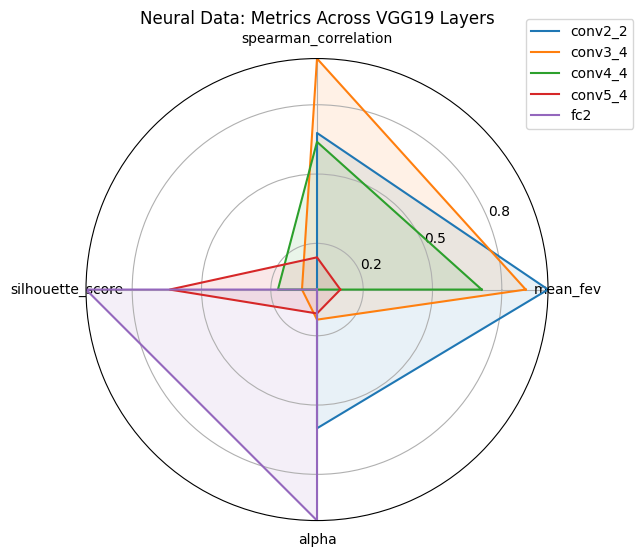

In [6]:
labels = metrics
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, row in avg_metrics_scaled.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, label=row['layer'])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0.2, 0.5, 0.8])
ax.set_yticklabels(['0.2', '0.5', '0.8'])
ax.set_ylim(0, 1)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title("Neural Data: Metrics Across VGG19 Layers")
plt.show()